# Import des données

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn import linear_model
from scipy import sparse
from datetime import datetime
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv("projet 3/2016_01.csv", sep=",", low_memory=False)

On ignore les lignes avec un nombre de colonnes différents (présentes dans le fichier d'avril)

In [4]:
for i in range(2, 13):
    deleted_rows = []
    if i < 10:
        n = '0' + str(i)
    else:
        n = str(i)
    tmp = pd.read_csv("projet 3/2016_" + n + ".csv", sep=",", low_memory=False, error_bad_lines=False)
    
    if i == 4:
        tmp = tmp.drop(tmp.index[[88686, 385885, 455021, 454115, 461808]])

    df = df.append(tmp)

b'Skipping line 121012: expected 65 fields, saw 75\nSkipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\nSkipping line 453858: expected 65 fields, saw 97\n'


In [3]:
df.shape

(5635973, 65)

In [4]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

In [5]:
df.head(15)

YEAR QUARTER  MONTH DAY_OF_MONTH DAY_OF_WEEK     FL_DATE UNIQUE_CARRIER  \
0   2016       1      1            6           3  2016-01-06             AA   
1   2016       1      1            7           4  2016-01-07             AA   
2   2016       1      1            8           5  2016-01-08             AA   
3   2016       1      1            9           6  2016-01-09             AA   
4   2016       1      1           10           7  2016-01-10             AA   
5   2016       1      1           11           1  2016-01-11             AA   
6   2016       1      1           12           2  2016-01-12             AA   
7   2016       1      1           13           3  2016-01-13             AA   
8   2016       1      1           14           4  2016-01-14             AA   
9   2016       1      1           15           5  2016-01-15             AA   
10  2016       1      1           16           6  2016-01-16             AA   
11  2016       1      1           17           7  2016-01-17             AA   
12  2016       1      1           18           1  2016-01-18             AA   
13  2016       1      1           19           2  2016-01-19             AA   
14  2016       1      1           20           3  2016-01-20             AA   

    AIRLINE_ID CARRIER TAIL_NUM     ...     DISTANCE_GROUP CARRIER_DELAY  \
0        19805      AA   N4YBAA     ...                4.0           NaN   
1        19805      AA   N434AA     ...                4.0           NaN   
2        19805      AA   N541AA     ...                4.0           NaN   
3        19805      AA   N489AA     ...                4.0           NaN   
4        19805      AA   N439AA     ...                4.0           0.0   
5        19805      AA   N468AA     ...                4.0           NaN   
6        19805      AA   N4YBAA     ...                4.0           NaN   
7        19805      AA   N569AA     ...                4.0           NaN   
8        19805      AA   N466AA     ...                4.0           NaN   
9        19805      AA   N501AA     ...                4.0           NaN   
10       19805      AA   N438AA     ...                4.0           NaN   
11       19805      AA   N426AA     ...                4.0           NaN   
12       19805      AA   N566AA     ...                4.0           NaN   
13       19805      AA   N499AA     ...                4.0           NaN   
14       19805      AA   N4YPAA     ...                4.0           NaN   

    WEATHER_DELAY NAS_DELAY SECURITY_DELAY LATE_AIRCRAFT_DELAY FIRST_DEP_TIME  \
0             NaN       NaN            NaN                 NaN            NaN   
1             NaN       NaN            NaN                 NaN            NaN   
2             NaN       NaN            NaN                 NaN            NaN   
3             NaN       NaN            NaN                 NaN            NaN   
4             0.0      47.0            0.0                66.0            NaN   
5             NaN       NaN            NaN                 NaN            NaN   
6             NaN       NaN            NaN                 NaN            NaN   
7             NaN       NaN            NaN                 NaN            NaN   
8             NaN       NaN            NaN                 NaN            NaN   
9             NaN       NaN            NaN                 NaN            NaN   
10            NaN       NaN            NaN                 NaN            NaN   
11            NaN       NaN            NaN                 NaN            NaN   
12            NaN       NaN            NaN                 NaN            NaN   
13            NaN       NaN            NaN                 NaN            NaN   
14            NaN       NaN            NaN                 NaN            NaN   

    TOTAL_ADD_GTIME LONGEST_ADD_GTIME Unnamed: 64  
0               NaN               NaN         NaN  
1               NaN               NaN         NaN  
2               NaN               NaN         NaN  
3               N

# Data analysis

In [43]:
# ARR_DELAY column is identified as the output. Check that N/A value means no delay at all
4 * sum(df['ARR_DELAY'].isna())-sum(df.loc[df['ARR_DELAY'].isna(), 'WEATHER_DELAY'].isna()) \
- sum(df.loc[df['ARR_DELAY'].isna(), 'NAS_DELAY'].isna()) \
- sum(df.loc[df['ARR_DELAY'].isna(), 'SECURITY_DELAY'].isna()) \
- sum(df.loc[df['ARR_DELAY'].isna(), 'LATE_AIRCRAFT_DELAY'].isna())

0

(array([4.86497e+05, 2.93444e+05, 2.13302e+05, 1.60308e+05, 1.22290e+05,
        9.74960e+04, 7.89640e+04, 6.45950e+04, 5.45010e+04, 4.62580e+04,
        4.05220e+04, 3.49960e+04, 3.06040e+04, 2.77740e+04, 2.45720e+04,
        2.21760e+04, 2.01180e+04, 1.82340e+04, 1.66840e+04, 1.52780e+04,
        1.42470e+04, 1.27850e+04, 1.20020e+04, 1.07440e+04, 1.02320e+04,
        9.59400e+03, 8.72800e+03, 8.12400e+03, 7.73000e+03, 7.07300e+03,
        6.52300e+03, 6.26600e+03, 5.85200e+03, 5.41100e+03, 5.16400e+03,
        4.82000e+03, 4.48100e+03, 4.07700e+03, 3.94600e+03, 3.66200e+03,
        3.57400e+03, 3.24200e+03, 3.11100e+03, 2.89100e+03, 2.71300e+03,
        2.54000e+03, 2.34700e+03, 2.18200e+03, 2.17800e+03, 2.03600e+03,
        1.96500e+03, 1.73400e+03, 1.69400e+03, 1.65000e+03, 1.42900e+03,
        1.49300e+03, 1.33800e+03, 1.21500e+03, 1.18100e+03, 1.13600e+03,
        1.09000e+03, 1.01700e+03, 9.65000e+02, 8.62000e+02, 8.58000e+02,
        8.25000e+02, 7.47000e+02, 7.24000e+02, 7.00

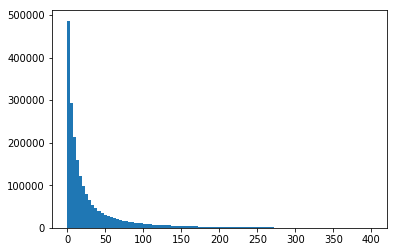

In [56]:
#histogram of the delay
plt.hist(df['ARR_DELAY'].fillna(0.0), 100, range=(0,400))

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

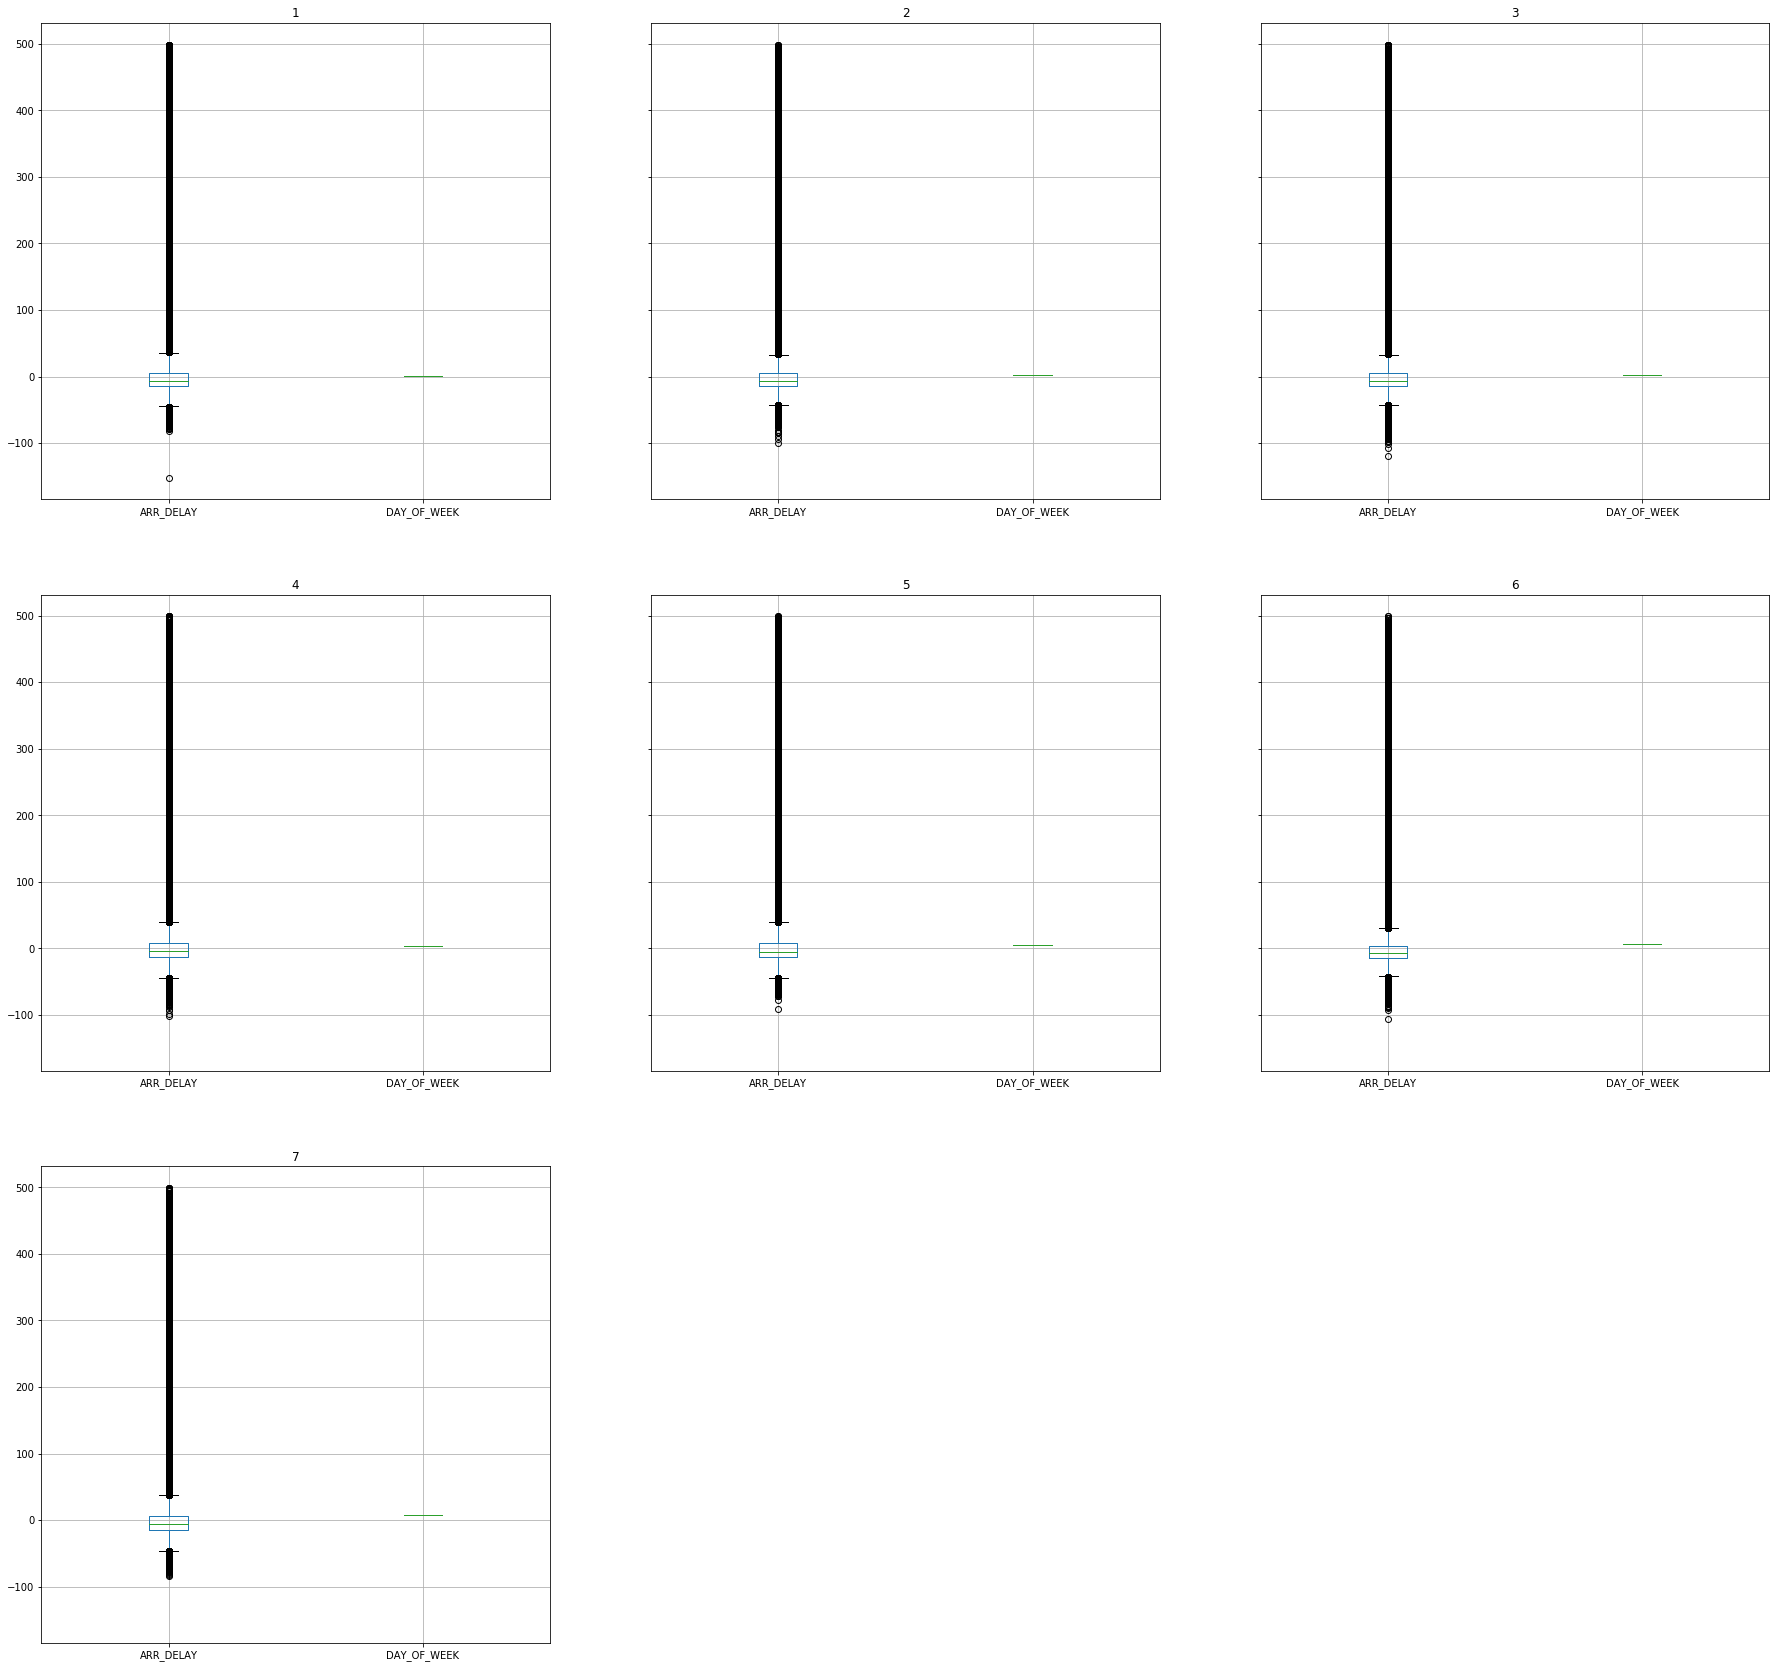

In [34]:
df2 = pd.DataFrame(df['ARR_DELAY'].fillna(0.0).astype(float))
df2['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype(int)
df2[df2['ARR_DELAY'] < 500].groupby('DAY_OF_WEEK').boxplot(figsize=(30,30))

In [29]:
df2.groupby('DAY_OF_WEEK').max()

ARR_DELAY
DAY_OF_WEEK           
1               1567.0
2               1971.0
3               1630.0
4               2142.0
5               1568.0
6               1643.0
7               2028.0

In [35]:
df2.groupby('DAY_OF_WEEK').std()

ARR_DELAY
DAY_OF_WEEK           
1            41.894343
2            40.600561
3            39.413829
4            42.125106
5            43.444543
6            41.507103
7            42.076776

In [36]:
df2.groupby('DAY_OF_WEEK').mean()

ARR_DELAY
DAY_OF_WEEK           
1             3.782974
2             2.441886
3             2.291319
4             5.372617
5             5.437311
6             1.445653
7             3.200741

In [4]:
df = df.drop(columns=['YEAR', 'FLIGHTS', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST_DEP_TIME',
       'TOTAL_ADD_GTIME', 'LONGEST_ADD_GTIME', 'Unnamed: 64'])

# Features engineering

3 features doivent être encodés:
- Aéroport de départ
- Aéroport d'arrivée
- Compagnie aérienne

In [5]:
df = df.dropna(subset=['ARR_DELAY'])
df = df.dropna(subset=['DEP_DELAY'])
df = df.reset_index(drop=True)
data = df.loc[:,['AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']].astype(float).values

In [5]:
encoder = OneHotEncoder()
encoder = encoder.fit(data)
dataEncoded = encoder.transform(data)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [32]:
#the other inputs
X = pd.DataFrame()
X['MONTH'] = df['MONTH']
X['DAY_OF_MONTH'] = df['DAY_OF_MONTH']
X['DAY_OF_WEEK'] = df['DAY_OF_WEEK'].astype(int)
X['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(int)
X['DISTANCE'] = df['DISTANCE']

In [12]:
#output
Y = pd.DataFrame()
Y['ARR_DELAY'] = df['ARR_DELAY'].fillna(0.0)

In [8]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X.astype(float).values))

In [9]:
X = sparse.hstack((X.astype(float).to_sparse(), dataEncoded))

Test de nouvelles inputs

In [7]:
encoder = LabelEncoder()

In [7]:
f = lambda row: datetime(2016, int(row['MONTH']), int(row['DAY_OF_MONTH']), int(row['CRS_DEP_TIME'] / 100), int(row['CRS_DEP_TIME'] - 100*int(row['CRS_DEP_TIME'] / 100)),0)
df['departure_date'] = df.apply(f, axis=1)

In [8]:
df_roll = pd.DataFrame()
df_roll['AIRLINE_ID'] = df['AIRLINE_ID']
df_roll['ORIGIN_AIRPORT_ID'] = df['ORIGIN_AIRPORT_ID']
df_roll['DEST_AIRPORT_ID'] = df['DEST_AIRPORT_ID']
df_roll['DEP_DELAY'] = df['DEP_DELAY']
df_roll['ARR_DELAY'] = df['ARR_DELAY']
df_roll['departure_date'] = df['departure_date']

In [9]:
df_roll = df_roll.sort_values(by=['departure_date']).groupby(['AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'])

In [15]:
df_rolled = pd.DataFrame(columns = ['AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DEP_DELAY', 'ARR_DELAY', 'departure_date'])
for to_roll in df_roll:
    df_rolled = df_rolled.append(to_roll[1].rolling(window='3h', on='departure_date').mean().fillna(0.0))
    #df_rolled = df_rolled.append(to_roll[1].loc[:,['DEP_DELAY', 'departure_date']].shift().rolling(window='3h', on='departure_date').mean().fillna(0.0))    

In [16]:
df_rolled.columns = ['AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'MEAN_3H_DEP_DELAY', 'MEAN_3H_ARR_DELAY', 'departure_date']
df2 = df.join(df_rolled.loc[:,['MEAN_3H_DEP_DELAY', 'MEAN_3H_ARR_DELAY']], how='inner', rsuffix='_r')

In [18]:
#df2 = df2.drop(columns=['AIRLINE_ID_r', 'ORIGIN_AIRPORT_ID_r', 'DEST_AIRPORT_ID_r', 'departure_date_r'])
df2.to_csv('df2.csv', index=False)

In [19]:
df2

QUARTER  MONTH DAY_OF_MONTH DAY_OF_WEEK     FL_DATE UNIQUE_CARRIER  \
0             1      1            6           3  2016-01-06             AA   
1             1      1            7           4  2016-01-07             AA   
2             1      1            8           5  2016-01-08             AA   
3             1      1            9           6  2016-01-09             AA   
4             1      1           10           7  2016-01-10             AA   
5             1      1           11           1  2016-01-11             AA   
6             1      1           12           2  2016-01-12             AA   
7             1      1           13           3  2016-01-13             AA   
8             1      1           14           4  2016-01-14             AA   
9             1      1           15           5  2016-01-15             AA   
10            1      1           16           6  2016-01-16             AA   
11            1      1           17           7  2016-01-17             AA   
12            1      1           18           1  2016-01-18             AA   
13            1      1           19           2  2016-01-19             AA   
14            1      1           20           3  2016-01-20             AA   
15            1      1           21           4  2016-01-21             AA   
16            1      1           22           5  2016-01-22             AA   
17            1      1           23           6  2016-01-23             AA   
18            1      1           24           7  2016-01-24             AA   
19            1      1           25           1  2016-01-25             AA   
20            1      1           26           2  2016-01-26             AA   
21            1      1           27           3  2016-01-27             AA   
22            1      1           28           4  2016-01-28             AA   
23            1      1           29           5  2016-01-29             AA   
24            1      1           30           6  2016-01-30             AA   
25            1      1           31           7  2016-01-31             AA   
26            1      1            1           5  2016-01-01             AA   
27            1      1            2           6  2016-01-02             AA   
28            1      1            3           7  2016-01-03             AA   
29            1      1            4           1  2016-01-04             AA   
...         ...    ...          ...         ...         ...            ...   
5556165       4     12           31           6  2016-12-31             WN   
5556166       4     12           31           6  2016-12-31             WN   
5556167       4     12           31           6  2016-12-31             WN   
5556168       4     12           31           6  2016-12-31             WN   
5556169       4     12           31           6  2016-12-31             WN   
5556170       4     12           31           6  2016-12-31             WN   
5556171       4     12           31           6  2016-12-31             WN   
5556172       4     12           31           6  2016-12-31             WN   
5556173       4     12           31           6  2016-12-31             WN   
5556174       4     12           31           6  2016-12-31             WN   
5556175       4     12           31           6  2016-12-31             WN   
5556176       4     12           31           6  2016-12-31             WN   
5556177       4     12           31           6  2016-12-31             WN   
5556178       4     12           31           6  2016-12-31             WN   
5556179       4     12           31           6  2016-12-31             WN   
5556180       4     12           31           6  2016-12-31             WN   
5556181       4     12           31           6  2016-12-31             WN   
5556182       4     12           31           6  2016-12-31             WN   
5556183       4     12           31           6  2016-12-31             WN   
5556184       4     12        

In [5]:
df2 = pd.read_csv('df2.csv', sep=",", low_memory=False)

In [8]:
X1 = pd.DataFrame()
X1['AIRLINE_ID'] = encoder.fit_transform(df2.loc[:,['AIRLINE_ID']].values.ravel())
X1['ORIGIN_AIRPORT_ID'] = encoder.fit_transform(df2.loc[:,['ORIGIN_AIRPORT_ID']].astype(float).values.ravel())
X1['DEST_AIRPORT_ID'] = encoder.fit_transform(df2.loc[:,['DEST_AIRPORT_ID']].astype(float).values.ravel())
X1['DAY_OF_WEEK'] = df2['DAY_OF_WEEK'].astype(int)
X1['MONTH'] = df2['MONTH']
X1['DEP_TIME'] = df2['DEP_TIME'].astype(float)
X1['MEAN_3H_DEP_DELAY'] = df2['MEAN_3H_DEP_DELAY']

X2 = pd.DataFrame(X1)
X2['DEP_DELAY'] = df2['DEP_DELAY']

In [9]:
#outputs
Y1 = pd.DataFrame()
Y1['DEP_DELAY'] = df2['DEP_DELAY']
Y2 = pd.DataFrame()
Y2['ARR_DELAY'] = df2['ARR_DELAY']

# Régression

Tout d'abord on sépare les données de test et train

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1.values, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2.values, test_size=0.3)

## 1. Régression linéaire

In [27]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

18.00554162885541


Erreur très décevante. Est-ce que les inputs sont responsables ou le modèle n'est pas adapté?

In [11]:
#try a ridge regression
ridge = linear_model.Ridge()
n_alphas = 10
ridge_params = { 'alpha': np.logspace(-5, 5, n_alphas) }
ridge_CV = GridSearchCV(ridge, ridge_params, scoring = 'neg_mean_absolute_error', cv = 5)
ridge_CV.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [12]:
y_pred = ridge_CV.predict(X1_test)
print(mean_absolute_error(y1_test, y_pred))

4.938723022971847e-11


In [13]:
ridge_CV.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': None,
 'estimator__normalize': False,
 'estimator__random_state': None,
 'estimator__solver': 'auto',
 'estimator__tol': 0.001,
 'estimator': Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'alpha': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
         2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
         7.74263683e+03, 1.00000000e+05])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': 'neg_mean_absolute_error',
 'verbose': 0}

In [14]:
pd.DataFrame(ridge_CV.cv_results_)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.369861      0.007775         0.029646        0.002014        1e-05   
1       0.364522      0.000664         0.028352        0.000070  0.000129155   
2       0.365047      0.000366         0.028342        0.000044    0.0016681   
3       0.364427      0.000442         0.028516        0.000338    0.0215443   
4       0.364884      0.000438         0.028395        0.000060     0.278256   
5       0.364869      0.000544         0.028435        0.000228      3.59381   
6       0.364715      0.000118         0.028293        0.000103      46.4159   
7       0.364724      0.000406         0.028333        0.000066      599.484   
8       0.365738      0.002090         0.028348        0.000135      7742.64   
9       0.372105      0.007716         0.028893        0.000591       100000   

                             params  split0_test_score  split1_test_score  \
0                  {'alpha': 1e-05}      -9.043073e-11      -2.020977e-10   
1  {'alpha': 0.0001291549665014884}      -8.977693e-11      -2.027386e-10   
2  {'alpha': 0.0016681005372000592}      -8.138928e-11      -2.109759e-10   
3   {'alpha': 0.021544346900318846}      -6.149807e-11      -3.185271e-10   
4     {'alpha': 0.2782559402207126}      -1.523150e-09      -1.757965e-09   
5      {'alpha': 3.593813663804626}      -2.061011e-08      -2.072900e-08   
6      {'alpha': 46.41588833612782}      -2.671322e-07      -2.658338e-07   
7      {'alpha': 599.4842503189421}      -3.451082e-06      -3.431483e-06   
8      {'alpha': 7742.636826811277}      -4.457233e-05      -4.431636e-05   
9               {'alpha': 100000.0}      -5.754981e-04      -5.721895e-04   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0      -1.155102e-11      -2.013547e-11       ...           -7.867442e-11   
1      -1.095292e-11      -2.077828e-11       ...           -7.854688e-11   
2      -9.091912e-12      -2.912927e-11       ...           -7.811055e-11   
3      -1.192330e-10      -1.404132e-10       ...           -1.406441e-10   
4      -1.597476e-09      -1.608853e-09       ...           -1.604480e-09   
5      -2.070067e-08      -2.058278e-08       ...           -2.064513e-08   
6      -2.674284e-07      -2.656409e-07       ...           -2.665828e-07   
7      -3.454032e-06      -3.430681e-06       ...           -3.442984e-06   
8      -4.460955e-05      -4.430771e-05       ...           -4.446674e-05   
9      -5.759778e-04      -5.720815e-04       ...           -5.741338e-04   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0    6.840240e-11                3       -9.045686e-11       -2.025540e-10   
1    6.863968e-11                2       -8.980274e-11       -2.031977e-10   
2    7.093082e-11                1       -8.141141e-11       -2.114698e-10   
3    9.413667e-11                4       -6.152079e-11       -3.194482e-10   
4    8.375451e-11                5       -1.524041e-09       -1.764236e-09   
5    5.831303e-11                6       -2.062201e-08       -2.080506e-08   
6    7.144970e-10                7       -2.672863e-07       -2.668113e-07   
7    9.929683e-09                8       -3.453073e-06       -3.444103e-06   
8    1.289727e-07                9       -4.459803e-05       -4.447935e-05   
9    1.665832e-06               10       -5.758301e-04       -5.742941e-04   

   split2_train_score  split3_train_score  split4_train_score  \
0       -1.153379e-11       -2.015296e-11       -6.908910e-11   
1       -1.093749e-11       -2.079611e-11       -6.842061e-11   
2       -9.064764e-12       -2.915162e-11       -5.991239e-11   
3       -1.188387e-10       -1.404837e-10       -6.348913e-11   
4       -1.592226e-09       -1.609558e-09       -1.532801e-09   
5       -2.063261e-08       -2.059171e-08       -2.057434e-08   
6       -2.665490e-07       -2.657561e-07       -2.665065e-07   
7       -3.442675e-06       -3.432169e-06      

In [15]:
ridge_CV.best_params_

{'alpha': 0.0016681005372000592}

In [16]:
ridge = linear_model.Ridge(alpha=ridge_CV.best_params_['alpha'])
ridge.fit(X1_train, y1_train)
y_pred = ridge.predict(X1_test)
print(mean_absolute_error(y1_test, y_pred))

4.938723022971847e-11


In [51]:
ridge = linear_model.Ridge()
n_alphas = 10
ridge_params = { 'alpha': np.logspace(-5, 5, n_alphas) }
ridge_CV = GridSearchCV(ridge, ridge_params, scoring = 'neg_mean_absolute_error', cv = 5)
ridge_CV.fit(X2_train, y2_train)
ridge = linear_model.Ridge(alpha=ridge_CV.best_params_['alpha'])
ridge.fit(X2_train, y2_train)
y_pred = ridge.predict(X2_test)
print(mean_absolute_error(y2_test, y_pred))

9.034447291572155


In [15]:
#try a lasso regression
lasso = linear_model.Lasso()
n_alphas = 10
lasso_params = { 'alpha': np.logspace(-5, 5, n_alphas) }
lasso_CV = GridSearchCV(lasso, lasso_params, scoring = 'neg_mean_absolute_error', cv = 5)
lasso_CV.fit(X_train, y_train)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coo

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [16]:
pd.DataFrame(lasso_CV.cv_results_)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0     249.828055      1.457726         0.000791        0.000034        1e-05   
1     134.927494     53.189325         0.000786        0.000014  0.000129155   
2      14.990263      6.118700         0.000843        0.000024    0.0016681   
3       3.196391      0.184530         0.000794        0.000023    0.0215443   
4       0.417964      0.000370         0.000794        0.000022     0.278256   
5       0.310018      0.001563         0.000800        0.000026      3.59381   
6       0.206120      0.000303         0.000795        0.000029      46.4159   
7       0.207816      0.001852         0.000824        0.000041      599.484   
8       0.209085      0.000804         0.000814        0.000040      7742.64   
9       0.207122      0.000611         0.000793        0.000022       100000   

                             params  split0_test_score  split1_test_score  \
0                  {'alpha': 1e-05}         -21.123880         -20.978449   
1  {'alpha': 0.0001291549665014884}         -21.116111         -20.970739   
2  {'alpha': 0.0016681005372000592}         -21.076506         -20.934251   
3   {'alpha': 0.021544346900318846}         -21.053486         -20.926384   
4     {'alpha': 0.2782559402207126}         -21.156791         -21.047513   
5      {'alpha': 3.593813663804626}         -21.372845         -21.267899   
6      {'alpha': 46.41588833612782}         -21.424028         -21.328892   
7      {'alpha': 599.4842503189421}         -21.424028         -21.328892   
8      {'alpha': 7742.636826811277}         -21.424028         -21.328892   
9               {'alpha': 100000.0}         -21.424028         -21.328892   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0         -20.815946         -21.025922       ...              -20.916995   
1         -20.807752         -21.017510       ...              -20.908943   
2         -20.779273         -20.969757       ...              -20.870016   
3         -20.785738         -20.952377       ...              -20.859588   
4         -20.879871         -21.068533       ...              -20.968791   
5         -21.118803         -21.251195       ...              -21.179585   
6         -21.169990         -21.315194       ...              -21.235717   
7         -21.169990         -21.315194       ...              -21.235717   
8         -21.169990         -21.315194       ...              -21.235717   
9         -21.169990         -21.315194       ...              -21.235717   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.170266                4          -20.781041          -20.857334   
1        0.170370                3          -20.776859          -20.852637   
2        0.169228                2          -20.765407          -20.840588   
3        0.163901                1          -20.778107          -20.853698   
4        0.165184                5          -20.895581          -20.965160   
5        0.167017                6          -21.107352          -21.170451   
6        0.168491                7          -21.159970          -21.228930   
7        0.168491                7          -21.159970          -21.228930   
8        0.168491                7          -21.159970          -21.228930   
9        0.168491                7          -21.159970          -21.228930   

   split2_train_score  split3_train_score  split4_train_score  \
0          -20.863019          -20.825377          -20.966849   
1          -20.858375          -20.820440          -20.962562   
2          -20.848551          -20.807109          -20.947876   
3          -20.861944          -20.821216          -20.963835   
4          -20.978906          -20.927874          -21.073967   
5          -21.195133          -21.130213          -21.293076   
6          -21.242373          -21.197108          -21.349569   
7          -21.242373          -21.197108      

In [17]:
lasso_CV.best_params_

{'alpha': 0.021544346900318846}

In [18]:
lasso = linear_model.Lasso(alpha=0.021544346900318846)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

20.850303583708126


In [19]:
#try a elastic net regression
elasticNet = linear_model.ElasticNet()
elasticNet_params = { 'alpha': np.logspace(-5, 5, 10), 'l1_ratio': np.linspace(0, 1, 10) }
elasticNet_CV = GridSearchCV(elasticNet, elasticNet_params, scoring = 'neg_mean_absolute_error', cv = 5)
elasticNet_CV.fit(X_train, y_train)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coo

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05]), 'l1_ratio': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [20]:
pd.DataFrame(elasticNet_CV.cv_results_)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0      254.560703      2.055152         0.000837        0.000063        1e-05   
1      256.468442      4.749767         0.001226        0.000628        1e-05   
2      257.780638      5.746105         0.000860        0.000134        1e-05   
3      248.402344      0.421143         0.000767        0.000005        1e-05   
4      248.388326      0.344928         0.000772        0.000007        1e-05   
5      248.339726      0.352533         0.000776        0.000007        1e-05   
6      248.219296      0.354198         0.000820        0.000068        1e-05   
7      248.010375      0.216356         0.000768        0.000005        1e-05   
8      247.982292      0.178859         0.000768        0.000009        1e-05   
9      247.946060      0.251401         0.000770        0.000006        1e-05   
10     248.591856      0.220989         0.000773        0.000011  0.000129155   
11     247.594024      0.419573         0.000771        0.000010  0.000129155   
12     246.422800      0.591829         0.000770        0.000006  0.000129155   
13     245.156618      0.501876         0.000779        0.000018  0.000129155   
14     243.777920      0.759238         0.000778        0.000011  0.000129155   
15     242.532702      0.784118         0.000770        0.000011  0.000129155   
16     241.544319      0.780230         0.000845        0.000152  0.000129155   
17     213.593944     53.410230         0.000788        0.000027  0.000129155   
18     212.738860     51.782703         0.000798        0.000029  0.000129155   
19     134.184695     53.087789         0.000782        0.000014  0.000129155   
20     248.670059      0.311491         0.000771        0.000008    0.0016681   
21      33.764306      1.334311         0.000791        0.000020    0.0016681   
22      30.276863      3.957486         0.000791        0.000015    0.0016681   
23      28.947627      4.785773         0.000809        0.000034    0.0016681   
24      28.428805      5.591031         0.000827        0.000092    0.0016681   
25      31.325652      6.224683         0.000798        0.000019    0.0016681   
26      33.803590      7.182575         0.000778        0.000007    0.0016681   
27      29.812261     11.306574         0.000778        0.000006    0.0016681   
28      33.537134     19.623307         0.000774        0.000007    0.0016681   
29      14.700553      6.049474         0.000779        0.000007    0.0016681   
..            ...           ...              ...             ...          ...   
70     248.900362      0.235704         0.000774        0.000009      599.484   
71       0.205244      0.000124         0.000779        0.000015      599.484   
72       0.205279      0.000222         0.000773        0.000009      599.484   
73       0.205274      0.000239         0.000774        0.000004      599.484   
74       0.205164      0.000141         0.000772        0.000009      599.484   
75       0.205200      0.000204         0.000773        0.000009      599.484   
76       0.205541      0.000665         0.000780        0.000012      599.484   
77       0.205190      0.000221         0.000773        0.000011      599.484   
78       0.205266      0.000285         0.000772        0.000009      599.484   
79       0.205209      0.000315         0.000774        0.000011      599.484   
80     248.887271      0.180466         0.000769        0.000009      7742.64   
81       0.204966      0.000278         0.000778        0.000025      7742.64   
82       0.205037      0.000159         0.000771        0.000008      7742.64   
83       0.204969      0.000247         0.000776        0.000010      7742.64   
84       0.205025      0.000161         0.000770        0.000008      7742.64   
85       0.205187      0.000236         0.000773        0.000005      7742.64   
86       0.204930      0.000170         0.000771        0.000006      7742.64   
87       0.204882      0.000170    

In [21]:
elasticNet_CV.best_params_

{'alpha': 0.0016681005372000592, 'l1_ratio': 0.0}

In [11]:
elasticNet = linear_model.ElasticNet(alpha=0.0016681005372000592, l1_ratio=0.0)
elasticNet.fit(X_train, y_train)
y_pred = elasticNet.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

20.866009229567645


/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## 2. SVR

In [18]:
svr = SVR(max_iter=500)
svr_params = { 'kernel':['linear', 'rbf'], 'C': np.logspace(-5, 5, 10) }
svr_CV = GridSearchCV(svr, svr_params, scoring = 'neg_mean_absolute_error', cv = 5)
svr_CV.fit(X_train,y_train.ravel())

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or M

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=500, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': array([1.00000e-05, 1.29155e-04, 1.66810e-03, 2.15443e-02, 2.78256e-01,
       3.59381e+00, 4.64159e+01, 5.99484e+02, 7.74264e+03, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [19]:
pd.DataFrame(svr_CV.cv_results_)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

mean_fit_time  std_fit_time  mean_score_time  std_score_time      param_C  \
0        9.726122      0.054850         1.281811        0.009361        1e-05   
1       12.004272      0.224718         1.846656        0.059024        1e-05   
2        9.870593      0.095534         1.305218        0.023431  0.000129155   
3       11.772085      0.050217         1.800467        0.024752  0.000129155   
4        9.575114      0.030112         1.270814        0.006157    0.0016681   
5       11.656168      0.062828         1.767760        0.011037    0.0016681   
6        9.615286      0.035018         1.277406        0.007803    0.0215443   
7       11.740902      0.212842         1.799432        0.037734    0.0215443   
8        9.664770      0.093072         1.301824        0.020739     0.278256   
9       11.703757      0.049420         1.769622        0.003862     0.278256   
10       9.589313      0.020589         1.277950        0.007414      3.59381   
11      11.746392      0.102743         1.782724        0.014294      3.59381   
12       9.723747      0.087469         1.282403        0.023762      46.4159   
13      11.766725      0.168675         1.780379        0.019255      46.4159   
14       8.114509      0.025791         1.054112        0.012764      599.484   
15      11.694722      0.081557         1.776530        0.008222      599.484   
16       5.939584      0.106182         0.627639        0.028849      7742.64   
17      11.906888      0.082185         1.809389        0.018986      7742.64   
18       4.480986      0.195355         0.323832        0.050076       100000   
19      11.282321      0.047245         1.720003        0.031919       100000   

   param_kernel                                            params  \
0        linear                  {'C': 1e-05, 'kernel': 'linear'}   
1           rbf                     {'C': 1e-05, 'kernel': 'rbf'}   
2        linear  {'C': 0.0001291549665014884, 'kernel': 'linear'}   
3           rbf     {'C': 0.0001291549665014884, 'kernel': 'rbf'}   
4        linear  {'C': 0.0016681005372000592, 'kernel': 'linear'}   
5           rbf     {'C': 0.0016681005372000592, 'kernel': 'rbf'}   
6        linear   {'C': 0.021544346900318846, 'kernel': 'linear'}   
7           rbf      {'C': 0.021544346900318846, 'kernel': 'rbf'}   
8        linear     {'C': 0.2782559402207126, 'kernel': 'linear'}   
9           rbf        {'C': 0.2782559402207126, 'kernel': 'rbf'}   
10       linear      {'C': 3.593813663804626, 'kernel': 'linear'}   
11          rbf         {'C': 3.593813663804626, 'kernel': 'rbf'}   
12       linear      {'C': 46.41588833612782, 'kernel': 'linear'}   
13          rbf         {'C': 46.41588833612782, 'kernel': 'rbf'}   
14       linear      {'C': 599.4842503189421, 'kernel': 'linear'}   
15          rbf         {'C': 599.4842503189421, 'kernel': 'rbf'}   
16       linear      {'C': 7742.636826811277, 'kernel': 'linear'}   
17          rbf         {'C': 7742.636826811277, 'kernel': 'rbf'}   
18       linear               {'C': 100000.0, 'kernel': 'linear'}   
19          rbf                  {'C': 100000.0, 'kernel': 'rbf'}   

    split0_test_score  split1_test_score  split2_test_score       ...         \
0         -105.512080        -105.256101        -105.818971       ...          
1         -105.512313        -105.256210        -105.818826       ...          
2         -105.509297        -105.254798        -105.820710       ...          
3         -105.512304        -105.256206        -105.818831       ...          
4         -105.473353        -105.237979        -105.843167       ...          
5         -105.512194        -105.256154        -105.818900       ...          
6         -105.311075        -105.020751        -106.041757       ...          
7         -105.510771        -105.255492        -105.819792       ...          
8         -105.897717        -104.016967        -105.653572       ...          
9         -105.492395        -105.246936        -105

In [20]:
svr_CV.predict(X_test)

array([478.53397216, 492.74806525, 522.30077898, ..., 357.91064629,
       459.52215364, 356.66991589])

In [20]:
baseline_error = np.mean((svr_CV.predict(X_test) - y_test.ravel()) ** 2)
print(baseline_error)

13536.07965614048


In [21]:
np.sqrt(151241)

388.89715864223024

In [27]:
svr_CV.best_params_

{'C': 7742.636826811277, 'kernel': 'rbf'}

In [28]:
svr = SVR(C=7742.636826811277, kernel='rbf', max_iter=500)
svr.fit(X_train,y_train.ravel())
y_pred = svr.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


273.3350096804155


## 3. LightGBM

In [39]:
gbm = lgb.LGBMRegressor(objective='regression',
                        n_estimators=100)

gbm_params = { 'learning_rate': np.linspace(5.0, 50.0, 5)/1000, 'num_leaves': np.linspace(30, 300, 10).astype(int), 'max_depth': np.linspace(10, 40, 4).astype(int) }
gbm_CV = GridSearchCV(gbm, gbm_params, scoring = 'neg_mean_absolute_error', cv = 5)

gbm_CV.fit(X2_train, y2_train.ravel())

#,
#eval_set=[(X_test, y_test.ravel())],
 #       eval_metric='rmsle',
  #      early_stopping_rounds=5

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': array([0.005  , 0.01625, 0.0275 , 0.03875, 0.05   ]), 'num_leaves': array([ 30,  60,  90, 120, 150, 180, 210, 240, 270, 300]), 'max_depth': array([10, 20, 30, 40])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [40]:
pd.DataFrame(gbm_CV.cv_results_)

/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/jct/Documents/Repos/envs/jupyter/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         7.738144      0.174887         0.465280        0.007914   
1        10.606344      1.273480         0.663101        0.028478   
2        12.982940      0.991117         0.763238        0.011525   
3        52.859073     39.736779         0.985005        0.085170   
4       125.318017      8.609685         1.180906        0.070136   
5       140.223533      8.383654         1.250442        0.027713   
6       146.710337     12.064705         1.323353        0.017261   
7       121.038702     70.894643         1.241442        0.120532   
8        21.215168      3.633371         1.199468        0.064182   
9        19.200275      1.649683         1.200570        0.009750   
10        7.802163      0.654325         0.513979        0.026370   
11       10.314425      0.377812         0.666481        0.008783   
12       12.024602      0.416448         0.796238        0.010981   
13       13.081474      0.517470         0.900360        0.007656   
14       14.171952      0.731799         1.016792        0.086431   
15       15.512945      0.671921         1.050854        0.033518   
16       17.438352      0.712821         1.116860        0.007064   
17       16.803795      0.191404         1.147872        0.011444   
18       17.662454      0.491263         1.198203        0.016967   
19       18.410159      1.954508         1.226803        0.008838   
20        6.926095      0.096248         0.505066        0.006905   
21       10.275152      0.865324         0.663613        0.005869   
22       13.673489      2.371108         0.787733        0.018244   
23       14.715630      0.764472         0.921804        0.016991   
24       16.560610      0.761120         0.996002        0.011517   
25       20.970093      4.753044         1.099998        0.079295   
26       18.418954      1.982979         1.092131        0.016721   
27       18.563786      2.434408         1.204101        0.057108   
28       17.798996      1.172979         1.196305        0.033955   
29       18.768085      1.214632         1.225570        0.008130   
..             ...           ...              ...             ...   
170       7.581375      0.120460         0.638228        0.006945   
171       9.619410      0.063642         0.834981        0.009610   
172      10.811000      0.157544         0.947504        0.005081   
173      11.822911      0.044177         1.041345        0.004446   
174      12.494452      0.060513         1.125216        0.005554   
175      13.262550      0.181208         1.191570        0.005378   
176      13.956931      0.242168         1.264859        0.010420   
177      14.324869      0.088416         1.344664        0.070979   
178      14.821210      0.094060         1.358592        0.004040   
179      15.363845      0.171601         1.375413        0.009979   
180       7.634857      0.092265         0.645924        0.011773   
181       9.633597      0.076534         0.829932        0.012515   
182      10.922515      0.028071         0.934444        0.002879   
183      11.880358      0.173444         1.041083        0.005855   
184      12.763895      0.624863         1.130520        0.009973   
185      13.196485      0.100941         1.203119        0.007276   
186      13.776776      0.090745         1.264158        0.011973   
187      14.318990      0.092107         1.301772        0.007693   
188      14.671611      0.149255         1.347901        0.006768   
189      15.409334      0.165431         1.374259        0.006493   
190       7.622502      0.117781         0.636131        0.005137   
191       9.658498      0.062956         0.829692        0.009936   
192      10.886048      0.278195         0.936741        0.005517   
193      11.897861      0.092183         1.041307        0.008174   
194      12.583932      0.083993         1.127515        0.006110   
195      13.261177      0.095043         1.212926        0.012233   
196

In [41]:
gbm_CV.predict(X2_test)

array([-10.85053558,  -9.66788115,  22.11881049, ...,   8.3092328 ,
        -5.07410919,  14.09129971])

In [43]:
baseline_error = np.mean((gbm_CV.predict(X2_test) - y2_test.ravel()) ** 2)
print(baseline_error)

157.78335872675115


In [44]:
gbm_CV.best_params_

{'learning_rate': 0.05, 'max_depth': 30, 'num_leaves': 300}

In [60]:
gbm = lgb.LGBMRegressor(objective='regression',
                        n_estimators=100,
                        learning_rate=0.05, 
                        max_depth=30, 
                        num_leaves=300)
gbm.fit(X2_train, y2_train.ravel())
y_pred = gbm.predict(X2_test)
print(mean_absolute_error(y2_test, y_pred))

8.641445655470275


# Export

We will use pickle to save the already fitted object and then boost API prediction

In [17]:
#retained model for dep_delay is ridge regression
output = open('dep_delay_estimator.pkl', 'wb')
pickle.dump(ridge, output)
output.close()

In [62]:
#retained model for dep_delay is LightGBM regression
output = open('arr_delay_estimator.pkl', 'wb')
pickle.dump(gbm, output)
output.close()

In [63]:
encoder = LabelEncoder()
encoder.fit(df2.loc[:,['AIRLINE_ID']].values.ravel())
output = open('carrier_encoder.pkl', 'wb')
pickle.dump(encoder, output)
output.close()

In [64]:
encoder = LabelEncoder()
encoder.fit(df2.loc[:,['ORIGIN_AIRPORT_ID']].astype(float).values.ravel())
output = open('airport_encoder.pkl', 'wb')
pickle.dump(encoder, output)
output.close()

In [14]:
output = open('scaler.pkl', 'wb')
pickle.dump(sc, output)
output.close()

In [19]:
carriers = pd.DataFrame(df.loc[:, ['AIRLINE_ID', 'CARRIER']].drop_duplicates())
carriers = carriers.reset_index(drop=True)

AIRLINE_ID CARRIER
0        19805      AA
1        19930      AS
2        20409      B6
3        19790      DL
4        20436      F9
5        19690      HA
6        20416      NK
7        20366      EV
8        20304      OO
9        19977      UA
10       21171      VX
11       19393      WN

In [71]:
airports = df.loc[:, ['ORIGIN', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME']]
airports.append(pd.DataFrame(df.loc[:, ['DEST', 'DEST_AIRPORT_ID', 'DEST_CITY_NAME']].values))
airports = airports.drop_duplicates(subset=['ORIGIN', 'ORIGIN_CITY_NAME'])
airports = airports.reset_index(drop=True)

In [72]:
airports.loc[airports['ORIGIN_CITY_NAME'].str.contains('New York'), :]

ORIGIN ORIGIN_AIRPORT_ID ORIGIN_CITY_NAME
3     JFK             12478     New York, NY
28    LGA             12953     New York, NY

In [73]:
distance = df.loc[:, ['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'DISTANCE']]
distance = distance.drop_duplicates(subset=['ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'])
distance = distance.reset_index(drop=True)

In [74]:
distance

ORIGIN_AIRPORT_ID DEST_AIRPORT_ID  DISTANCE
0                11298           11433     986.0
1                11433           11298     986.0
2                14747           12478    2422.0
3                12478           14747    2422.0
4                14831           13930    1829.0
5                13930           14831    1829.0
6                14107           11298     868.0
7                15016           11298     550.0
8                11298           15016     550.0
9                12892           11278    2311.0
10               13930           15304    1012.0
11               13204           13930    1005.0
12               11292           13303    1709.0
13               13303           11292    1709.0
14               12758           12892    2504.0
15               12892           12758    2504.0
16               11298           13303    1121.0
17               13303           11298    1121.0
18               12266           13303     964.0
19               13303           12266     964.0
20               13303           12478    1089.0
21               12478           13303    1089.0
22               10423           12478    1521.0
23               12478           10423    1521.0
24               12892           13303    2342.0
25               13303           12892    2342.0
26               12889           11298    1055.0
27               11298           12889    1055.0
28               12892           12889     236.0
29               12889           12892     236.0
...                ...             ...       ...
8552             13244           14107    1264.0
8553             12954           10792    2209.0
8554             12892           12945    1904.0
8555             12945           12892    1904.0
8556             11884           13127      89.0
8557             14107           11503     513.0
8558             10372           11298     701.0
8559             11298           10372     701.0
8560             11503           14107     513.0
8561             14107           14674     370.0
8562             14674           14107     370.0
8563             12094           14679     769.0
8564             14679           12094     769.0
8565             11648           12892    1014.0
8566             12892           11648    1014.0
8567             10372           14869     292.0
8568             15096           12397      46.0
8569             14869           10372     292.0
8570             11648           14771     844.0
8571             14771           11648     844.0
8572             15389           12892     626.0
8573             14747           15041     475.0
8574             15041           14747     475.0
8575             15389           14747     514.0
8576             12264           11697     901.0
8577             11697           12264     901.0
8578             12264           11503    1573.0
8579             11503           12264    1573.0
8580             11775           11447     330.0
8581             13891           12892      47.0

[8582 rows x 3 columns]

In [96]:
output = open('carriers.pkl', 'wb')
pickle.dump(carriers, output)
output.close()

output = open('airports.pkl', 'wb')
pickle.dump(airports, output)
output.close()

output = open('distance.pkl', 'wb')
pickle.dump(distance, output)
output.close()

In [95]:
df.loc[:, ['ORIGIN_CITY_NAME', 'ORIGIN', 'DEST_CITY_NAME', 'DEST', 'CARRIER', 'MONTH', 'DAY_OF_MONTH', 'CRS_DEP_TIME', 'ARR_DELAY']]

ORIGIN_CITY_NAME ORIGIN         DEST_CITY_NAME DEST CARRIER  \
0        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
1        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
2        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
3        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
4        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
5        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
6        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
7        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
8        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
9        Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
10       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
11       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
12       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
13       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
14       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
15       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
16       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
17       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
18       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
19       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
20       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
21       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
22       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
23       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
24       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
25       Dallas/Fort Worth, TX    DFW            Detroit, MI  DTW      AA   
26                 Detroit, MI    DTW  Dallas/Fort Worth, TX  DFW      AA   
27                 Detroit, MI    DTW  Dallas/Fort Worth, TX  DFW      AA   
28                 Detroit, MI    DTW  Dallas/Fort Worth, TX  DFW      AA   
29                 Detroit, MI    DTW  Dallas/Fort Worth, TX  DFW      AA   
...                        ...    ...                    ...  ...     ...   
5635943              Tampa, FL    TPA         Pittsburgh, PA  PIT      WN   
5635944              Tampa, FL    TPA         Pittsburgh, PA  PIT      WN   
5635945              Tampa, FL    TPA         Providence, RI  PVD      WN   
5635946              Tampa, FL    TPA         Providence, RI  PVD      WN   
5635947              Tampa, FL    TPA     Raleigh/Durham, NC  RDU      WN   
5635948              Tampa, FL    TPA          Rochester, NY  ROC      WN   
5635949              Tampa, FL    TPA        San Antonio, TX  SAT      WN   
5635950              Tampa, FL    TPA         Louisville, KY  SDF      WN   
5635951              Tampa, FL    TPA           San Juan, PR  SJU      WN   
5635952              Tampa, FL    TPA           San Juan, PR  SJU      WN   
5635953              Tampa, FL    TPA          St. Louis, MO  STL      WN   
5635954              Tulsa, OK    TUL             Dallas, TX  DAL      WN   
5635955              Tulsa, OK    TUL             Dallas, TX  DAL      WN   
5635956              Tulsa, OK    TUL             Dallas, TX  DAL      WN   
5635957              Tulsa, OK    TUL             Denver, CO  DEN      WN   
5635958              Tulsa, OK    TUL            Houston, TX  HOU      WN   
5635959              Tulsa, OK    TUL            Houston, TX  HOU      WN   
5635960              Tulsa, OK    TUL          Las Vegas, NV  LAS      WN   
5635961              Tulsa, OK    TUL            Phoenix, AZ  PHX      WN   
5635962              Tulsa, OK    TUL          St. Louis, MO  STL      WN   
5635963   

In [36]:
gbm.predict(X.getrow(5))

array([1.74504231])

In [35]:
Y.loc[5]

ARR_DELAY   -3.0
Name: 5, dtype: float64

In [37]:
ridge.predict(X.getrow(5635944))

array([[5.00194423]])

In [31]:
Y.loc[5635944]

ARR_DELAY    44.0
Name: 5635944, dtype: float64